In [69]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Business Understanding
(outline the questions you will answer along with why they are relevant and important)

### Questions to look into:
What is the relationship between the top 20 most rated books and the top 20 most reviewed books?  
    
What is the relationship with gender/sex in the top 20 most rated books? 
    
What is the relationship between race in the top 20 most rated books?  
    Interested in the diversity of the top 20 most rated books to see 
      
What is the relationship between category, genre, and subgenres in the top 20 most rated books?  
    
What is the relationship between books set in a universe versus solo stories for the top 20 most rated books?  
    

### Data Understanding

In [70]:
#read in corrected goodread dataset
original_goodread_df = pd.read_csv('corrected_goodread_df.csv', error_bad_lines = False)
original_goodread_df.head()

#create copy of dataframe
goodread_df = original_goodread_df.copy()

In [71]:
goodread_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10539 entries, 0 to 10538
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              10539 non-null  int64  
 1   title               10539 non-null  object 
 2   author              10539 non-null  object 
 3   average_rating      10539 non-null  float64
 4   isbn                10539 non-null  object 
 5   isbn13              10539 non-null  float64
 6   language_code       10539 non-null  object 
 7   num_pages           10539 non-null  int64  
 8   audio_hrs           10539 non-null  float64
 9   ratings_count       10539 non-null  int64  
 10  text_reviews_count  10539 non-null  int64  
 11  publication_date    10539 non-null  object 
 12  publisher           10539 non-null  object 
 13  series              10539 non-null  bool   
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 1.1+ MB


In [72]:
#check the descriptive statistics of the average rating
goodread_df.average_rating.describe()

count    10539.000000
mean         3.930489
std          0.350496
min          0.000000
25%          3.770000
50%          3.960000
75%          4.130000
max          5.000000
Name: average_rating, dtype: float64

There is a large gap between the minimum and the 25th percentile, which makes sense that most books being rated are being rated average to well-liked.

In [73]:
#check the descriptive statistics of the text reviews count
goodread_df.text_reviews_count.describe()

count    10539.000000
mean       569.089857
std       2643.664468
min          0.000000
25%         11.000000
50%         53.000000
75%        257.000000
max      94265.000000
Name: text_reviews_count, dtype: float64

There is a tremendous gap between the 75th percentile and the maximum, which suggests that the is a vast chasm between popular books and the rest of the books.

In [74]:
#check the descriptive statistics of the ratings count
#using code from https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation to suppress scientific notation
goodread_df.ratings_count.describe().apply(lambda x: format(x, 'f'))

count      10539.000000
mean       18789.943069
std       115385.627220
min            0.000000
25%          130.000000
50%          862.000000
75%         5519.000000
max      4597666.000000
Name: ratings_count, dtype: object

There is a gargantuan gap between the 75th percentile and the maximum, which suggests that the is a vast chasm between popular books and the rest of the books.

### Data Preparation
(show how you clean and prepare the data. It is important to document and not just write the code)

In [75]:
#check datatypes
goodread_df.dtypes

bookID                  int64
title                  object
author                 object
average_rating        float64
isbn                   object
isbn13                float64
language_code          object
num_pages               int64
audio_hrs             float64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
series                   bool
dtype: object

#### Fix datatypes and remove unneccesary columns

In [76]:
#create copy of df to fix datatypes
goodread_copy_df = goodread_df.copy()
goodread_copy_df.head()

#drop unneeded rows: bookID, isbn, isbn13, num_pages, audio_hrs, publisher
goodread_copy_df = goodread_copy_df.drop(columns=['bookID', 'isbn', 'isbn13', 'num_pages', 'audio_hrs', 'publisher'])

#update publication_date to datetime so that publication dates can be filtered by date
goodread_copy_df['publication_date'] = pd.to_datetime(goodread_copy_df['publication_date'])
 
#check datatypes    
goodread_copy_df.dtypes

title                         object
author                        object
average_rating               float64
language_code                 object
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
series                          bool
dtype: object

#### Remove duplicated titles from the dataframe

In [77]:
#check dataframe length
print(len(goodread_copy_df))

10539


In [78]:
#check titles with duplicates
titles_sum = goodread_copy_df.title.value_counts()
print(titles_sum.head(460))

The Iliad                                                    9
The Brothers Karamazov                                       9
Gulliver's Travels                                           8
Anna Karenina                                                8
'Salem's Lot                                                 8
                                                            ..
Inferno                                                      2
The Sea of Monsters (Percy Jackson and the Olympians  #2)    2
The Far Pavilions                                            2
Foxmask (Saga of the Light Isles  #2)                        2
Insurgent Collective Action and Civil War in El Salvador     1
Name: title, Length: 460, dtype: int64


In [79]:
#create a list of dupe books that need to be consolidated
dupe_titles = list(titles_sum.index.values)
dupe_titles = dupe_titles[:459]
dupe_titles

['The Iliad',
 'The Brothers Karamazov',
 "Gulliver's Travels",
 'Anna Karenina',
 "'Salem's Lot",
 'The Odyssey',
 "A Midsummer Night's Dream",
 'The Picture of Dorian Gray',
 'The Secret Garden',
 'Sense and Sensibility',
 'The Histories',
 'Robinson Crusoe',
 'The Great Gatsby',
 'Romeo and Juliet',
 'Collected Stories',
 'The Scarlet Letter',
 'Macbeth',
 'Treasure Island',
 'Paradise Lost',
 'Don Quixote',
 'The House of Mirth',
 'King Lear',
 'Frankenstein',
 'Pride and Prejudice',
 'Much Ado about Nothing',
 'A Tale of Two Cities',
 'The Communist Manifesto',
 'The Idiot',
 'Dracula',
 'The Enemy (Jack Reacher  #8)',
 'War and Peace',
 "Charlotte's Web",
 'One Hundred Years of Solitude',
 'The Shining',
 'The Return of the King (The Lord of the Rings  #3)',
 'Atlas Shrugged',
 'Jane Eyre',
 'Eugene Onegin',
 'Memoirs of a Geisha',
 'The Complete Plays',
 'Emma',
 'Hamlet',
 "The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy  #1)",
 'The Known World',
 'Selec

In [80]:
#check title list length
print(len(dupe_titles))

459


In [81]:
#create dataframe with The Brother Karamazov rows to see an example of title duplicates
karamazov_df = goodread_copy_df[(goodread_copy_df.title == 'The Brothers Karamazov')]
karamazov_df

,title,author,average_rating,language_code,ratings_count,text_reviews_count,publication_date,series
1286,The Brothers Karamazov,Fyodor Dostoyevsky,4.32,eng,983,91,1999-06-01,False
1287,The Brothers Karamazov,Fyodor Dostoyevsky,4.32,eng,191531,6795,2002-06-14,False
1288,The Brothers Karamazov,Fyodor Dostoyevsky,4.32,eng,1673,184,2003-02-27,False
1289,The Brothers Karamazov,Fyodor Dostoyevsky,4.32,eng,617,80,1991-09-03,False
1290,The Brothers Karamazov,Fyodor Dostoyevsky,4.32,eng,1089,202,2004-07-25,False
1502,The Brothers Karamazov,Fyodor Dostoyevsky,4.32,eng,443,55,1992-01-16,False
1843,The Brothers Karamazov,Fyodor Dostoyevsky,4.32,eng,1022,154,1984-04-01,False
10243,The Brothers Karamazov,Fyodor Dostoyevsky,4.32,eng,20,2,2005-05-01,False
10345,The Brothers Karamazov,Fyodor Dostoyevsky,4.32,eng,3,1,2005-05-01,False


In [82]:
#check for earliest and latest publication date as well as sums for rating counts and text review counts
print(karamazov_df['publication_date'].min())
print(karamazov_df['publication_date'].max())
print(karamazov_df['ratings_count'].sum(axis=0))
print(karamazov_df['text_reviews_count'].sum(axis=0))

1984-04-01 00:00:00
2005-05-01 00:00:00
197381
7564


In [85]:
#create dictionary for consolidated titles
consolidated_titles_dict = {'title': [], 'author': [], 'average_rating': [], 'language_code': [], 'series':[], 
                       'earliest_pub_date': [], 'latest_pub_date': [], 'ratings_count': [], 'text_reviews_count': []}

#create a function to consolidate duplicated title
def consolidate_dupe_books(title_list, df, consolidated_titles):
    """
    Description: This function can be used to read in a dataframe, consolidate duplicate titles based on a passed list,
    and return a dataframe with the consolidated titles
    
    Arguments:
    title_list: the cursor object. 
    df: dataframe
    consolidated_titles: dictionary to build the returned dataframe from
    
    Returns:
    dataframe
    """
    for title in title_list:
        title_df = df[(df.title == title)]
        indices_list = list(title_df.index.values)
        key_index = indices_list[0]
        consolidated_titles['title'].append(title_df['title'][key_index])
        consolidated_titles['author'].append(title_df['author'][key_index])
        consolidated_titles['average_rating'].append(title_df['average_rating'][key_index])
        consolidated_titles['language_code'].append(title_df['language_code'][key_index])
        consolidated_titles['series'].append(title_df['series'][key_index])
        consolidated_titles['earliest_pub_date'].append(title_df['publication_date'].min())
        consolidated_titles['latest_pub_date'].append(title_df['publication_date'].max())
        consolidated_titles['ratings_count'].append(title_df['ratings_count'].sum(axis=0))
        consolidated_titles['text_reviews_count'].append(title_df['text_reviews_count'].sum(axis=0))
        consolidated_books = pd.DataFrame.from_dict(consolidated_books_dict)
        
    return consolidated_books

#assign consolidated titles dictionary into a variable
consolidated_books_df = consolidate_dupe_books(dupe_titles, goodread_copy_df, consolidated_titles_dict)
consolidated_books_df

,title,author,average_rating,language_code,series,earliest_pub_date,latest_pub_date,ratings_count,text_reviews_count
0,The Iliad,Homer,3.86,eng,False,1992-03-19,2011-09-01,295539,3791
1,The Brothers Karamazov,Fyodor Dostoyevsky,4.32,eng,False,1984-04-01,2005-05-01,197381,7564
2,Gulliver's Travels,Jonathan Swift,3.57,eng,False,1980-03-01,2008-01-29,196135,3545
3,Anna Karenina,Leo Tolstoy,4.05,eng,False,2001-12-01,2004-11-23,141751,9106
4,'Salem's Lot,Stephen King,4.25,eng,False,1975-10-17,2010-10-06,85852,826
...,...,...,...,...,...,...,...,...,...
454,The Return of the Native,Thomas Hardy,3.86,eng,False,2001-02-13,2006-02-14,29630,986
455,Inferno,Dante Alighieri,4.00,eng,False,2004-08-03,2005-10-25,1294,111
456,The Sea of Monsters (Percy Jackson and the Oly...,Rick Riordan,4.24,eng,True,2006-04-01,2007-04-01,641062,21011
457,The Far Pavilions,M.M. Kaye,4.21,eng,False,1988-12-12,1997-01-15,37083,1032


In [86]:
#check consolidated dataframe length to make sure it matches the dupe_titles list length
print(len(consolidated_books_df))

459


In [87]:
# Get indexes where name column has values in title list
dupe_indices = []
for i in dupe_titles:
    title_df = goodread_copy_df[(goodread_copy_df.title == i)]
    indices_list = list(title_df.index.values)
    dupe_indices.append(goodread_copy_df[goodread_copy_df['title'] == i].index)
    
#flattening out the lists into a single list 
#code from https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists
flattened_dupe_indices = []
for sublist in dupe_indices:
    for item in sublist:
        flattened_dupe_indices.append(item)

#check lengths for the flattened list and the goodreads dataframe
print("The length of the duplicated titles index list is " + str(len(flattened_dupe_indices)))
print("The length of the goodread_copy_df is " + str(len(goodread_copy_df)))

# Delete these row indexes from dataFrame
goodread_copy_df = goodread_copy_df.drop(flattened_dupe_indices)

#check goodreads dataframe length to make sure it is goodread df - dupe indices list
print("The length of the goodread_copy_df is " + str(len(goodread_copy_df)))

The length of the duplicated titles index list is 1195
The length of the goodread_copy_df is 10539
The length of the goodread_copy_df is 9344


In [88]:
#create latest_pub_date and earliest_pub_date columns for books that do not have two publication dates
goodread_copy_df['latest_pub_date'] = goodread_copy_df['publication_date']
goodread_copy_df = goodread_copy_df.rename(columns={'publication_date': 'earliest_pub_date'}, errors="raise")
goodread_copy_df

,title,author,average_rating,language_code,ratings_count,text_reviews_count,earliest_pub_date,series,latest_pub_date
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,2153167,29221,2004-09-01,True,2004-09-01
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,41428,164,2004-09-13,True,2004-09-13
5,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,eng,19,1,2005-04-26,False,2005-04-26
6,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,28242,808,2005-09-12,True,2005-09-12
7,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,eng,3628,254,2005-11-01,True,2005-11-01
...,...,...,...,...,...,...,...,...,...
10534,Shipwreck (Island I),Gordon Korman,3.80,eng,103,14,2007-02-01,False,2007-02-01
10535,The Carl Hiaasen Collection: Lucky You and Sic...,Carl Hiaasen,4.32,eng,90,5,2006-06-06,False,2006-06-06
10536,The Full Box (Full #1-4),Janet Evanovich,4.29,eng,101,3,2016-02-16,True,2016-02-16
10537,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark,3.49,eng,64,2,1999-12-01,False,1999-12-01


In [89]:
#creating column name list
col_names = list(consolidated_books_df.columns)

#reorder goodread_df columns
goodread_copy_df = goodread_copy_df[col_names]
goodread_copy_df.head()

,title,author,average_rating,language_code,series,earliest_pub_date,latest_pub_date,ratings_count,text_reviews_count
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,True,2004-09-01,2004-09-01,2153167,29221
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,True,2004-09-13,2004-09-13,41428,164
5,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,eng,False,2005-04-26,2005-04-26,19,1
6,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,True,2005-09-12,2005-09-12,28242,808
7,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,eng,True,2005-11-01,2005-11-01,3628,254


In [90]:
#append consolidated books with the rest of the dataset and reset the index to avoid confusion later
goodread_consolidated_df = goodread_copy_df.append(consolidated_books_df)
goodread_consolidated_df = goodread_consolidated_df.reset_index(drop=True)
goodread_consolidated_df

,title,author,average_rating,language_code,series,earliest_pub_date,latest_pub_date,ratings_count,text_reviews_count
0,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,True,2004-09-01,2004-09-01,2153167,29221
1,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,True,2004-09-13,2004-09-13,41428,164
2,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,eng,False,2005-04-26,2005-04-26,19,1
3,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,True,2005-09-12,2005-09-12,28242,808
4,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,eng,True,2005-11-01,2005-11-01,3628,254
...,...,...,...,...,...,...,...,...,...
9798,The Return of the Native,Thomas Hardy,3.86,eng,False,2001-02-13,2006-02-14,29630,986
9799,Inferno,Dante Alighieri,4.00,eng,False,2004-08-03,2005-10-25,1294,111
9800,The Sea of Monsters (Percy Jackson and the Oly...,Rick Riordan,4.24,eng,True,2006-04-01,2007-04-01,641062,21011
9801,The Far Pavilions,M.M. Kaye,4.21,eng,False,1988-12-12,1997-01-15,37083,1032


#### Create top 20 dataframe slices for the most rated and most reviewed

In [91]:
#create slice of top 20 most rateed books
most_ratings_slice = goodread_consolidated_df.sort_values(by='ratings_count', ascending=False).head(20)
most_ratings_slice = most_ratings_slice.reset_index(drop=True)

#create slice of top 20 most reviewed books
most_reviews_slice = goodread_consolidated_df.sort_values(by='text_reviews_count', ascending=False).head(20)
most_reviews_slice = most_reviews_slice.reset_index(drop=True)

#create sorted slices of top 20 most reviewed and rated books with reset indices
top_20_most_ratings = most_ratings_slice['ratings_count'].sort_values(ascending=False).reset_index(drop=True)
top_20_most_reviews = most_reviews_slice['text_reviews_count'].sort_values(ascending=False).reset_index(drop=True)

#### Add gender and skin coloe columns

In [92]:
#add in columns with author gender and skin color data
most_ratings_slice['gender'] = ['cis woman', 'cis man', 'cis man', 'cis man', 'cis woman', 'cis woman', 'cis woman',
                                'cis man', 'cis man', 'cis woman', 'cis man', 'cis man', 'cis man','cis man',  
                                'cis man', 'cis man', 'cis man','cis woman', 'cis man', 'cis woman']
most_ratings_slice['skin_color'] = 'white'

most_ratings_slice

,title,author,average_rating,language_code,series,earliest_pub_date,latest_pub_date,ratings_count,text_reviews_count,gender,skin_color
0,Twilight (Twilight #1),Stephenie Meyer,3.59,eng,True,2006-09-06,2006-09-06,4597666,94265,cis woman,white
1,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,eng,False,2002-08-15,2002-08-15,2530894,32871,cis man,white
2,The Catcher in the Rye,J.D. Salinger,3.80,eng,False,2001-01-30,2001-01-30,2457092,43499,cis man,white
3,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,eng,True,2003-07-28,2006-04-01,2425666,22076,cis man,white
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,True,2004-05-01,2008-07-01,2342726,36465,cis woman,white
5,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,True,1999-06-02,2003-11-01,2300296,34936,cis woman,white
6,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,True,2004-09-01,2004-09-01,2153167,29221,cis woman,white
7,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,eng,True,2003-09-05,2004-06-01,2130267,13791,cis man,white
8,Animal Farm,George Orwell,3.93,eng,False,2003-05-06,2003-05-06,2111750,29677,cis man,white
9,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,True,2006-06-23,2006-09-16,2096903,27669,cis woman,white


#### Updates 'Series' column to hold something more descriptive than a Boolean value and create a spectrum variable instead of a binary

In [93]:
#list of top 20 most rated titles
most_ratings_slice['title']

0                               Twilight (Twilight  #1)
1                   The Hobbit  or There and Back Again
2                                The Catcher in the Rye
3                  Angels & Demons (Robert Langdon  #1)
4     Harry Potter and the Prisoner of Azkaban (Harr...
5     Harry Potter and the Chamber of Secrets (Harry...
6     Harry Potter and the Order of the Phoenix (Har...
7     The Fellowship of the Ring (The Lord of the Ri...
8                                           Animal Farm
9     Harry Potter and the Half-Blood Prince (Harry ...
10                                    Lord of the Flies
11                                     Romeo and Juliet
12    The Lightning Thief (Percy Jackson and the Oly...
13                                      Of Mice and Men
14               The Da Vinci Code (Robert Langdon  #2)
15                                        The Alchemist
16                                  Memoirs of a Geisha
17                            The Giver (The Giv

In [94]:
#update series column to be 'Part of Series', 'In Same Universe', 'Solo Story'
most_ratings_slice.series = most_ratings_slice.series.replace({True: 'Part of Series', False:'Solo Story'})
most_ratings_slice.series.iloc[1] = most_ratings_slice.series.iloc[1].replace('Solo Story', 'In Same Universe')
most_ratings_slice.series.iloc[19] = most_ratings_slice.series.iloc[19].replace('Solo Story', 'In Same Universe')

#check the updated column
most_ratings_slice['series']

/Users/jbryant/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0       Part of Series
1     In Same Universe
2           Solo Story
3       Part of Series
4       Part of Series
5       Part of Series
6       Part of Series
7       Part of Series
8           Solo Story
9       Part of Series
10          Solo Story
11          Solo Story
12      Part of Series
13          Solo Story
14      Part of Series
15          Solo Story
16          Solo Story
17      Part of Series
18          Solo Story
19    In Same Universe
Name: series, dtype: object

Below is a collection of the data used to augment the most_ratings_slice:
It's all fiction!   
Genres for top 20 titles:  
    Twilight: Romance, fantasy, young adult fiction (source: https://en.wikipedia.org/wiki/Twilight_(novel_series))  
    The Hobbit: High fantasy, Juvenile fantasy (source: https://en.wikipedia.org/wiki/The_Hobbit)  
    The Catcher in the Rye: Realistic fiction, Coming-of-age fiction (source: Wikipedia)  
    Angels & Demons/DaVinci Code: Mystery, Detective fiction, Conspiracy fiction, Thriller (source: Wikipedia)  
    Harry Potter books: Fantasy, drama, young adult fiction, mystery, thriller, Bildungsroman (source: Wikipedia)  
    Fellowship of the Ring: Fantasy (source: Wikipedia)  
    Animal Farm: Political satire (source: Wikipedia)   
    Lord of the Flies: Allegorical novel (source: Wikipedia)  
    Romeo and Juliet: Shakespearean tragedy (source: Wikipedia)  
    The Lightning Thief: Fantasy, Young adult, Greek mythology (source: Wikipedia)  
    Of Mice and Men: social realism (https://www.sparknotes.com/lit/micemen/genre/)  
    The Alchemist: Novel, Drama, Quest, Fantasy Fiction, Adventure fiction (https://en.wikipedia.org/wiki/The_Alchemist_(novel))  
    Memoirs of a Geisha: historical fiction, romance (https://en.wikipedia.org/wiki/Memoirs_of_a_Geisha; https://www.goodreads.com/book/show/929.Memoirs_of_a_Geisha)
    The Giver: Young adult fiction, Dystopian novel, Science fiction (source: https://en.wikipedia.org/wiki/The_Giver)  
    The Book Thief: Novel-Historical Fiction (https://en.wikipedia.org/wiki/The_Book_Thief)  
    Little Women: Coming of age, Bildungsroman (source: https://en.wikipedia.org/wiki/Little_Women)   

In [95]:
#add in genre and subgenre information in columns
most_ratings_slice['category'] = 'fiction'
most_ratings_slice['genre'] = ['romance', 'fantasy', 'coming-of-age', 'mystery', 'fantasy', 'fantasy', 'fantasy', 'fantasy', 
                               'political satire','fantasy', 'allegory', 'tragedy', 'fantasy', 'social realism', 
                               'mystery', 'fantasy', 'historical','science fiction', 'historical', 'coming-of-age']
most_ratings_slice['subgenre'] = ['fantasy', 'juvenile', 'realistic', 'detective', 'drama', 'drama', 'drama', 'epic', 
                               'allegory','drama', 'psychological', 'romance', 'young adult', 'tragedy', 
                               'detective', 'quest', 'romance','young adult', 'young adult', 'bildungsroman']
most_ratings_slice['subgenre_2'] = ['young adult', np.nan, np.nan, 'conspiracy', 'young adult', 'young adult', 'young adult', 'adventure', 
                               'dystopian','young adult', 'young adult', 'young adult', 'mythology', 'realistic', 
                               'conspiracy', 'adventure', 'adult fiction','dystopian', 'fantasy', 'juvenile']
most_ratings_slice['subgenre_3'] = [np.nan, np.nan, np.nan, 'thriller', 'mystery', 'mystery', 'mystery', 'action', 
                               'fable','mystery', np.nan, 'play', np.nan, np.nan, 
                               'thriller', 'drama', np.nan,'science fiction', 'adventure', 'comedy']
most_ratings_slice['subgenre_4'] = [np.nan, np.nan, np.nan, np.nan, 'thriller', 'thriller', 'thriller', np.nan, 
                               'science fiction','thriller', np.nan, np.nan, np.nan, np.nan, 
                               np.nan, np.nan, np.nan, np.nan, np.nan, 'autobiographical']
most_ratings_slice['subgenre_5'] = [np.nan, np.nan, np.nan, np.nan, 'bildungsroman', 'bildungsroman', 'bildungsroman', np.nan, 
                               np.nan,'bildungsroman', np.nan, np.nan, np.nan, np.nan, 
                               np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]

In [96]:
#consolidate genre and subgenres columns in a single column
book_genres = most_ratings_slice.melt(id_vars = ['title'], 
                          value_vars = ['genre', 'subgenre','subgenre_2', 'subgenre_3', 'subgenre_4', 'subgenre_5'], 
                          var_name = 'genres_subgenres', value_name='genre').dropna()

In [97]:
#make genres_subgenres a categorical datatype and order them
genre_levels = ['adult fiction','young adult', 'juvenile', 'coming-of-age', 'bildungsroman', 'historical', 'allegory',
               'action', 'adventure', 'quest', 'epic', 'fantasy', 'mythology','fable', 'science fiction', 'romance', 
               'comedy', 'drama', 'dystopian', 'mystery', 'thriller', 'psychological', 'detective', 'conspiracy', 
               'political satire', 'social realism', 'realistic', 'tragedy', 'play', 'autobiographical'
               ]
book_genres['genre'] = pd.Categorical(book_genres['genre'], categories=genre_levels)

### Results Evaluation

#### What is the relationship between the top 20 most rated books and the top 20 most reviewed books?
There is a lot of overlap between the most rated and the most reviewed; however the books that have more reviews and don't show up on the rating list tend to be books marketed toward women (e. g. Water for Elephants, Eat Pray Love).

In [98]:
most_ratings_slice['title']

0                               Twilight (Twilight  #1)
1                   The Hobbit  or There and Back Again
2                                The Catcher in the Rye
3                  Angels & Demons (Robert Langdon  #1)
4     Harry Potter and the Prisoner of Azkaban (Harr...
5     Harry Potter and the Chamber of Secrets (Harry...
6     Harry Potter and the Order of the Phoenix (Har...
7     The Fellowship of the Ring (The Lord of the Ri...
8                                           Animal Farm
9     Harry Potter and the Half-Blood Prince (Harry ...
10                                    Lord of the Flies
11                                     Romeo and Juliet
12    The Lightning Thief (Percy Jackson and the Oly...
13                                      Of Mice and Men
14               The Da Vinci Code (Robert Langdon  #2)
15                                        The Alchemist
16                                  Memoirs of a Geisha
17                            The Giver (The Giv

In [99]:
most_reviews_slice['title']

0                               Twilight (Twilight  #1)
1                                        The Book Thief
2                             The Giver (The Giver  #1)
3                                         The Alchemist
4                                   Water for Elephants
5     The Lightning Thief (Percy Jackson and the Oly...
6                                       Eat  Pray  Love
7                                      The Glass Castle
8                                The Catcher in the Rye
9     The Curious Incident of the Dog in the Night-Time
10               The Da Vinci Code (Robert Langdon  #2)
11    Harry Potter and the Prisoner of Azkaban (Harr...
12    Harry Potter and the Chamber of Secrets (Harry...
13                            Outlander (Outlander  #1)
14                                             The Road
15                  The Hobbit  or There and Back Again
16                                          Animal Farm
17                                   My Sister's

In [100]:
#create information to have well marked graphs
n_ratings = most_ratings_slice.ratings_count.sum()
max_ratings_count = top_20_most_ratings[0]
max_prop_rating = max_ratings_count/n_ratings
tick_props_ratings = np.arange(0, max_prop_rating, 0.02)
tick_names_ratings = ['{:0.2f}'.format(t) for t in tick_props_ratings]

<Figure size 864x504 with 0 Axes>

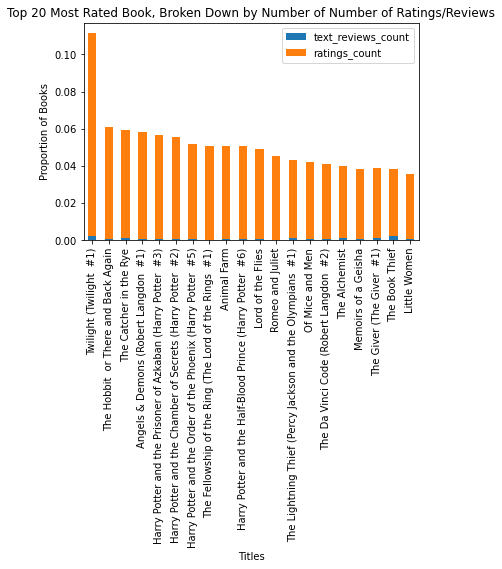

In [101]:
#create a stacked bar graph of the ratings/reviews for the most rated books
fig = plt.figure(figsize=(12,7))
most_ratings_slice.plot(x='title', y=['text_reviews_count', 'ratings_count'], kind="bar", stacked=True);
plt.title('Top 20 Most Rated Book, Broken Down by Number of Number of Ratings/Reviews');
plt.yticks(tick_props_ratings *n_ratings, tick_names_ratings);
plt.xlabel('Titles');
plt.ylabel('Proportion of Books');
plt.savefig('ratingsslice_ratings_reviews_bar.png')

<Figure size 864x504 with 0 Axes>

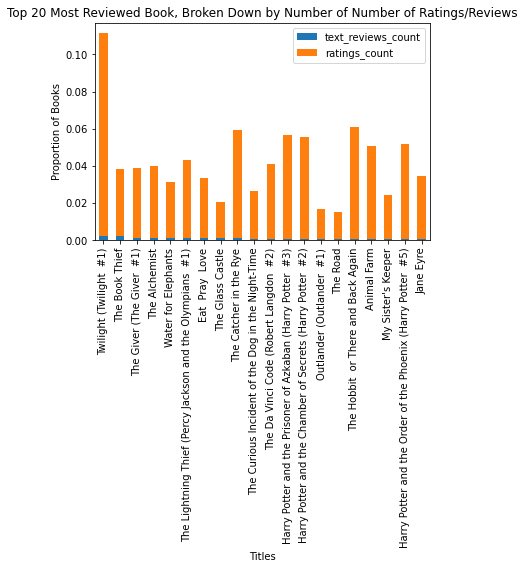

In [102]:
#create a stacked bar graph of the ratings/reviews for the most reviewed books
fig = plt.figure(figsize=(12,7))
most_reviews_slice.plot(x='title', y=['text_reviews_count', 'ratings_count'], kind="bar", stacked=True);
plt.title('Top 20 Most Reviewed Book, Broken Down by Number of Number of Ratings/Reviews');
plt.yticks(tick_props_ratings *n_ratings, tick_names_ratings);
plt.xlabel('Titles');
plt.ylabel('Proportion of Books');
plt.savefig('reviewsslice_ratings_reviews_bar.png');

#### What is the gender and skin color breakdown of authors of the top 20 most-rated books?
Two of the most boring graphs because there is no diversity to the authors. 

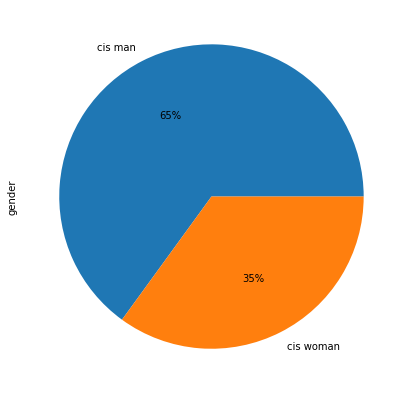

In [103]:
#create a pie chart of gender of the authors of the most rated books
gender_sum = most_ratings_slice['gender'].value_counts()
gender_sum

fig = plt.figure(figsize=(12,7))
#code taken from https://www.dataforeverybody.com/matplotlib-seaborn-pie-charts/
gender_sum.plot.pie(autopct="%.f%%");
plt.savefig('gender_sum_pie.png')

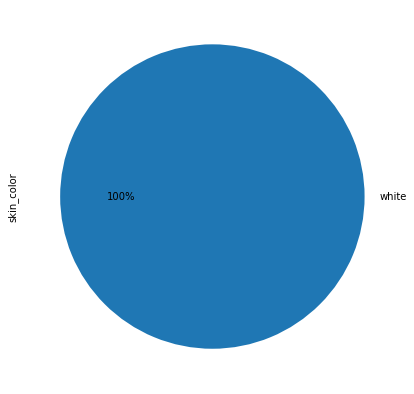

In [104]:
#create a pie chart of skin color of the authors of the most rated books
skin_color = most_ratings_slice['skin_color'].value_counts()
skin_color

fig = plt.figure(figsize=(12,7))
skin_color.plot.pie(autopct="%.f%%", labeldistance=-1.1);
plt.savefig('skin_color_pie.png')

#### What is the series/not-a-series breakdown in the top 20 most-rated books?
The common wisdom of a book being part of a series will help with popularity holds true as half of the books in the most rated are part of a series and another 10% are part of the same universe as other books.

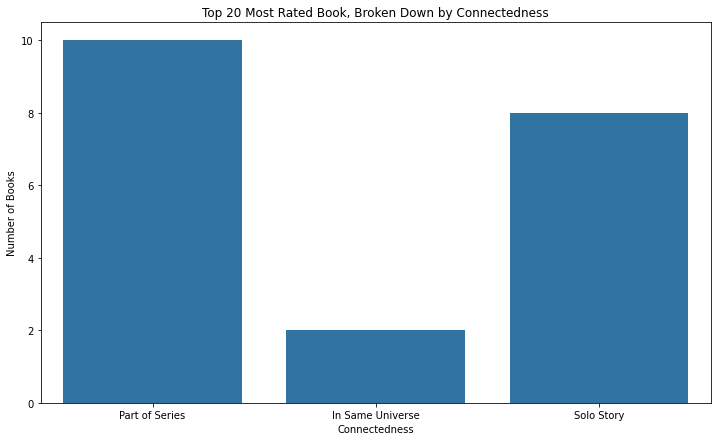

In [105]:
#create a bar chart of series/in the same universe/solo story status of the most rated books
fig = plt.figure(figsize=(12,7))
sns.countplot(data = most_ratings_slice, x = 'series', color=sns.color_palette()[0])

plt.title('Top 20 Most Rated Book, Broken Down by Connectedness')
plt.xlabel('Connectedness')
plt.ylabel('Number of Books');
plt.savefig('connected_books_bar.png')

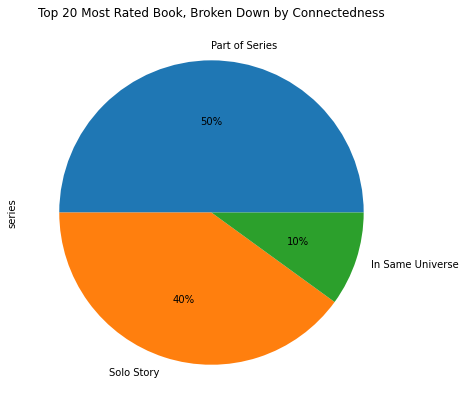

In [106]:
#create a pie chart of series/in the same universe/solo story status of the most rated books
series_sum = most_ratings_slice['series'].value_counts()
series_sum

#code taken from https://www.dataforeverybody.com/matplotlib-seaborn-pie-charts/
fig = plt.figure(figsize=(12,7))
series_sum.plot.pie(autopct="%.f%%");
plt.title('Top 20 Most Rated Book, Broken Down by Connectedness')
plt.savefig('connected_books_pie.png')

#### What is the genre breakdown in the top 20 most-rated books?
The most popular books are usually marketed toward children/young adults, have coming-of-age themes, and have some speculative element (fantasy, mythology, science fiction).

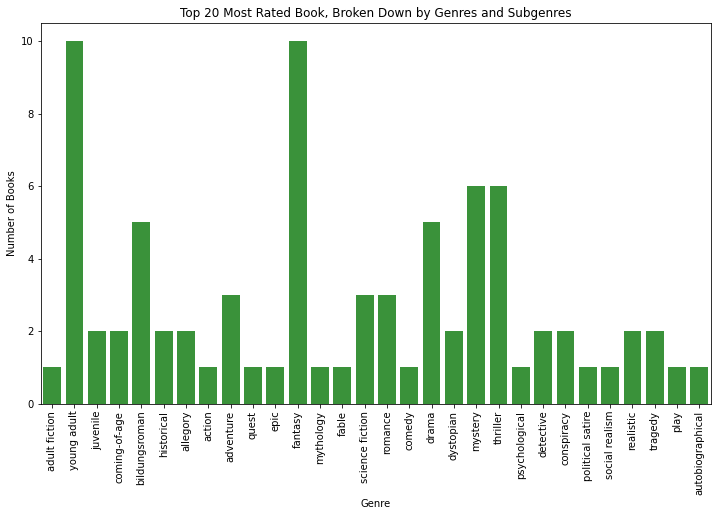

In [107]:
#sort/create information to have well marked graphs
book_genres = book_genres.sort_values(by='genre')
genre_order = book_genres.genre.unique()
genre_index = book_genres.index

#create bar graph showing the genres/subgenres of the top 20 most rated books
fig = plt.figure(figsize=(12,7))
sns.countplot(data = book_genres, x = 'genre', color=sns.color_palette()[2]);
plt.xticks(rotation=90);
plt.title('Top 20 Most Rated Book, Broken Down by Genres and Subgenres')
plt.xlabel('Genre')
plt.ylabel('Number of Books');
plt.savefig('genres_subgenres_bar.png');